In [4]:
def predict_yolo(img_path):
  # 이미지 가져오기
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  height, width, channels = img.shape

  blob = cv2.dnn.blobFromImage(img, 1/256, (416, 416), (0, 0, 0), swapRB=True, crop=False)
  net.setInput(blob)
  outs = net.forward(output_layers)

  class_ids = []
  confidences = []
  boxes = []
  for out in outs:
      for detection in out:
          scores = detection[5:]
          class_id = np.argmax(scores)
          confidence = scores[class_id]
          if confidence > 0.5:
              # Object detected
              center_x = int(detection[0] * width)
              center_y = int(detection[1] * height)
              w = int(detection[2] * width)
              h = int(detection[3] * height)
              # 좌표
              x = int(center_x - w / 2)
              y = int(center_y - h / 2)
              boxes.append([x, y, w, h])
              confidences.append(float(confidence))
              class_ids.append(class_id)

  indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

  font = cv2.FONT_HERSHEY_PLAIN
  colors = np.random.uniform(0, 255, size=(len(boxes), 3))
  if len(indexes) > 0:
    for i in indexes.flatten():
        x, y, w, h = boxes[i]
        print(x, y, w, h)
        label = str(classes[class_ids[i]])
        confidence = str(round(confidences[i], 2))
        color = colors[i]
        cv2.rectangle(img, (x, y), ((x+w), (y+h)), color, 2)
        cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (0, 255, 0), 2)

    plt.imshow(img)

  else:
    print('탐지된 물체가 없습니다.')

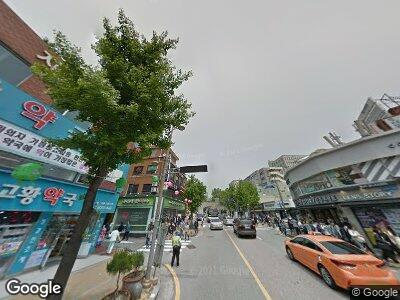

In [5]:
import requests
from PIL import Image
import io

# 위도, 경도
lat, lon = 37.593211256137074, 127.05265502186577

# 관측 시야(Field Of View) - 최대 120 기본값 90
fov = "150"
# 방향 - 범위 0 ~ 360 (0 or 360::북, 180: 남)
heading = "0"
# 카메라 상하 방향 설정 - 범위 -90 ~ 90 기본값 0
pitch = "30"

# 구글 API 키
google_api_key = "enter my key"

# URL
url = f"https://maps.googleapis.com/maps/api/streetview?size=400x300&location={lat},{lon}&fov={fov}&heading={heading}&pitch={pitch}&key={google_api_key}"

payload = {}
headers = {}
response = requests.request("GET", url, headers=headers, data=payload)

# 이미지 바이트 데이터
bytes_data = response.content

# 이미지 변환
img = Image.open(io.BytesIO(bytes_data))
img